DADOS


In [1]:
import pandas as pd

In [2]:
url = r'https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/refs/heads/main/Dados/dados_estudantes.csv'
data = pd.read_csv(url)
data

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Solteiro,Não,Masculino,19,Não,Não,Não,Sim,Não,15.5,...,5,13.600000,0,0,6,8,5,12.666667,0,Graduado
4420,Solteiro,Sim,Feminino,18,Sim,Não,Sim,Não,Não,11.1,...,6,12.000000,0,0,6,6,2,11.000000,0,Desistente
4421,Solteiro,Sim,Feminino,30,Não,Não,Não,Sim,Sim,13.9,...,7,14.912500,0,0,8,9,1,13.500000,0,Desistente
4422,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Sim,9.4,...,5,13.800000,0,0,5,6,5,12.000000,0,Graduado


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [4]:
data['Target'].value_counts()

Target
Graduado       2209
Desistente     1421
Matriculado     794
Name: count, dtype: int64

VISUALIZAR DADOS

In [5]:
data['Sexo'].value_counts(normalize=True)*100

Sexo
Feminino     64.82821
Masculino    35.17179
Name: proportion, dtype: float64

In [6]:
data['Estado civil'].value_counts(normalize=True)*100

Estado civil
Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: proportion, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

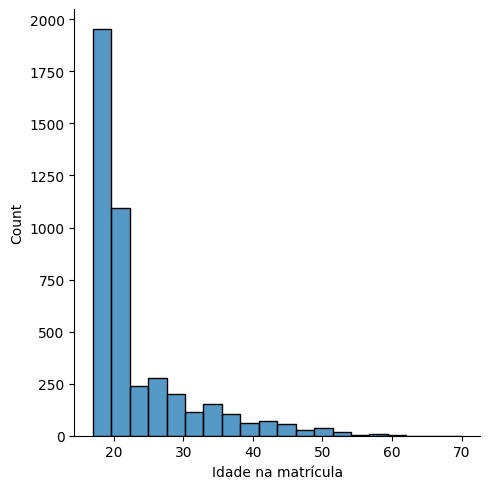

In [8]:
sns.displot(
    x='Idade na matrícula',
    data=data,
    bins=20
)
plt.show()

In [9]:
color_dict = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'}
sns.set_palette(list(color_dict.values()))

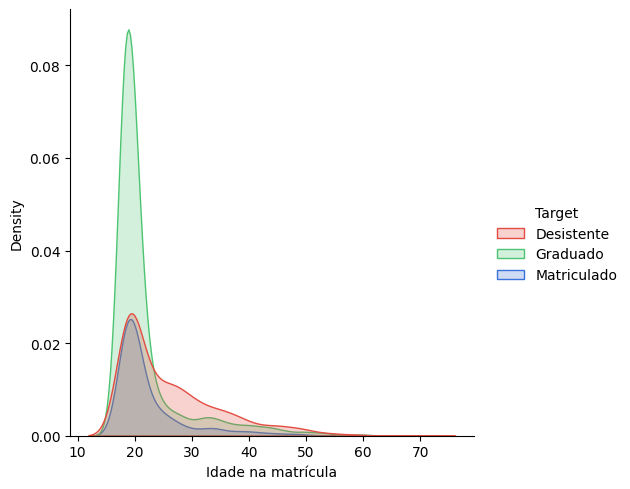

In [10]:
sns.displot(data=data, x='Idade na matrícula', hue='Target',kind='kde',fill=True)
plt.show()

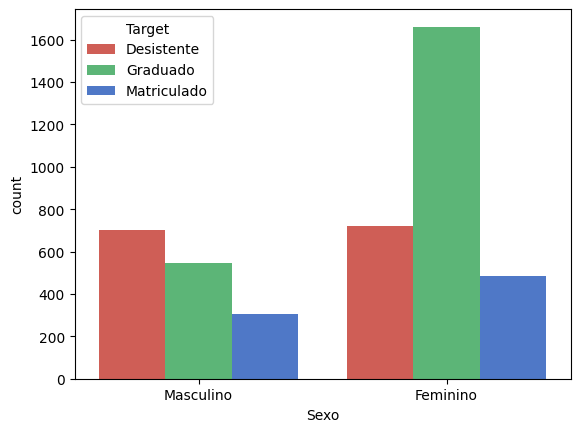

In [11]:
sns.countplot(
    x='Sexo',
    hue='Target',
    data=data
)
plt.show()

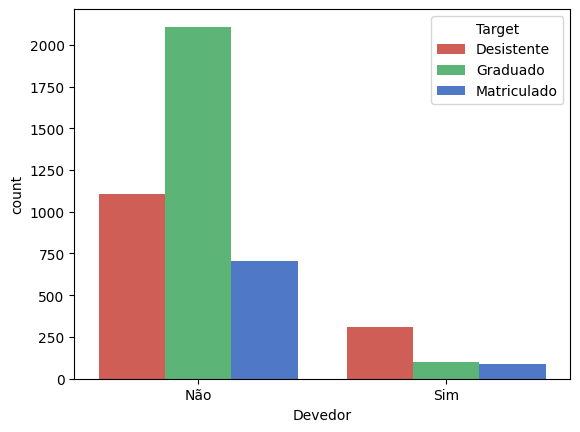

In [12]:
sns.countplot(
    x='Devedor',
    hue='Target',
    data=data
)
plt.show()

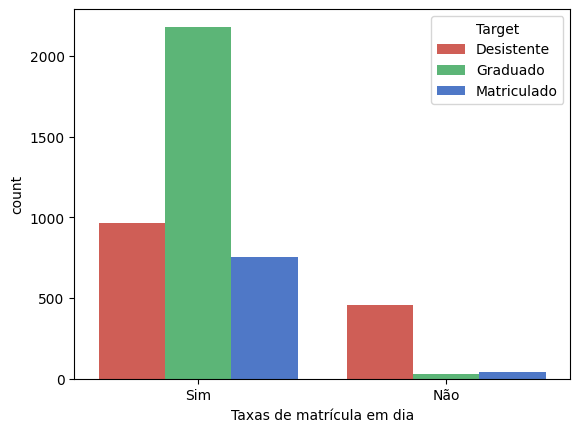

In [13]:
sns.countplot(
    x='Taxas de matrícula em dia',
    hue='Target',
    data=data
)
plt.show()

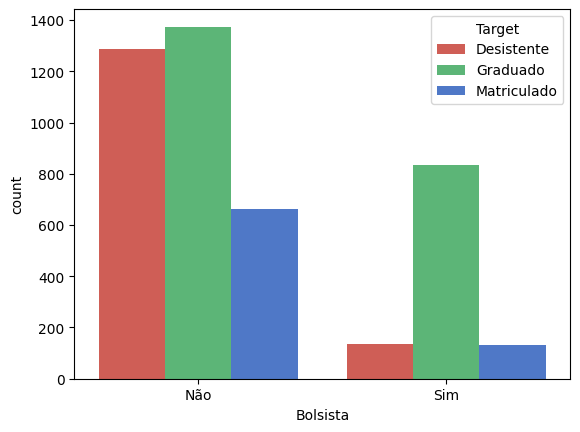

In [14]:
sns.countplot(
    x='Bolsista',
    hue='Target',
    data=data
)
plt.show()

In [15]:
import plotly.express as px

In [16]:
contagem = data.groupby(['Curso','Target']).size().reset_index(name='Contagem')
contagem['Porcentagem'] = contagem.groupby('Curso')['Contagem'].transform(lambda x: (x/x.sum())*100)
contagem

,Curso,Target,Contagem,Porcentagem
0,Agronomia,Desistente,86,40.952381
1,Agronomia,Graduado,87,41.428571
2,Agronomia,Matriculado,37,17.619048
3,Animação e Design Multimídia,Desistente,82,38.139535
4,Animação e Design Multimídia,Graduado,96,44.651163
5,Animação e Design Multimídia,Matriculado,37,17.209302
6,Design de Comunicação,Desistente,51,22.566372
7,Design de Comunicação,Graduado,133,58.849558
8,Design de Comunicação,Matriculado,42,18.584071
9,Educação Básica,Desistente,85,44.270833


In [17]:
fig = px.bar(
    contagem,
    y='Curso',
    x='Porcentagem',
    color='Target',
    orientation='h',
    color_discrete_map=color_dict
)
fig.show()

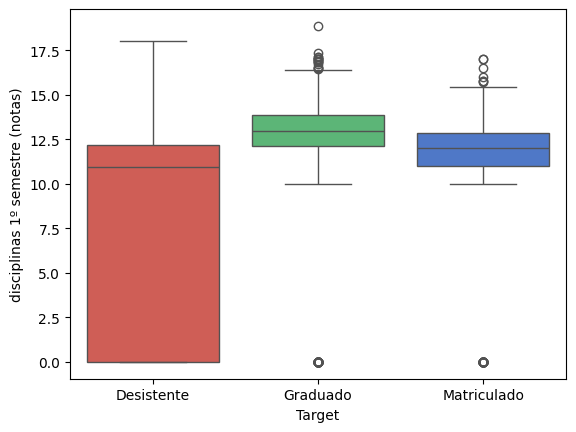

In [18]:
sns.boxplot(
    x='Target',
    y='disciplinas 1º semestre (notas)',
    data=data,
    hue='Target'
)
plt.show()

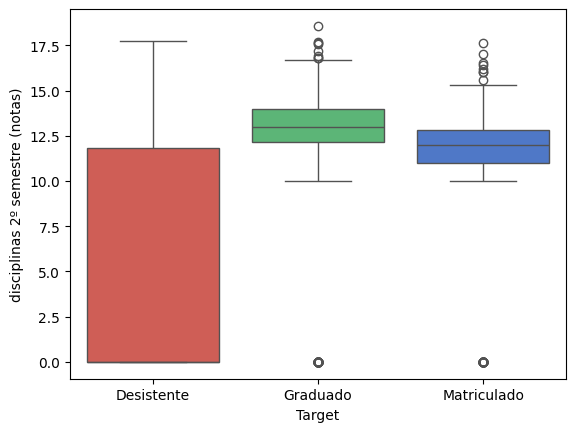

In [19]:
sns.boxplot(
    x='Target',
    y='disciplinas 2º semestre (notas)',
    data=data,
    hue='Target'
)
plt.show()

PREPARAR DADOS PARA O MODELO

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
colunas_string = data.select_dtypes(include=['object']).columns.tolist()
colunas_string = [x for x in colunas_string if x!='Target']
colunas_string

['Estado civil',
 'Migração',
 'Sexo',
 'Estrangeiro',
 'Necessidades educacionais especiais',
 'Devedor',
 'Taxas de matrícula em dia',
 'Bolsista',
 'Curso',
 'Período',
 'Qualificação prévia']

In [22]:
encoder = OneHotEncoder()

In [23]:
data_encoded = pd.DataFrame(
    encoder.fit_transform(
        data[colunas_string]
    ).toarray(),
    columns=encoder.get_feature_names_out(colunas_string)
)
df_final = pd.concat([data.drop(columns=colunas_string, errors='ignore'), data_encoded.drop(columns=colunas_string, errors='ignore')], axis=1)
df_final

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_final['Target'].unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

In [25]:
target_dict={
    'Desistente':0,
    'Graduado':1,
    'Matriculado':2,
}
df_final['Target'] = data['Target'].map(target_dict)
df_final['Target']

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 4424, dtype: int64

SEPARAR DADOS PARA O MODELO

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x=df_final.drop(columns=['Target'])
y=df_final['Target']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=23465)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=23465)

TREINAR MODELO

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier(
    random_state=23465,
    max_depth=100
)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, random_state=23465)

In [30]:
model.score(x_val, y_val)

0.7994350282485876

MATRIZ CONFUSAO

In [31]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

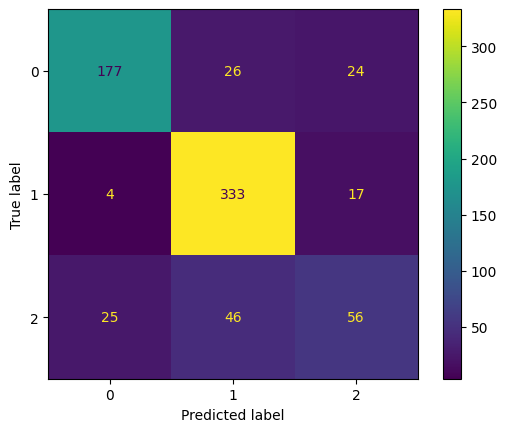

In [32]:
matriz = confusion_matrix(y_val, model.predict(x_val))

disp = ConfusionMatrixDisplay(
    confusion_matrix=matriz, 
    display_labels=model.classes_
    )

disp.plot()

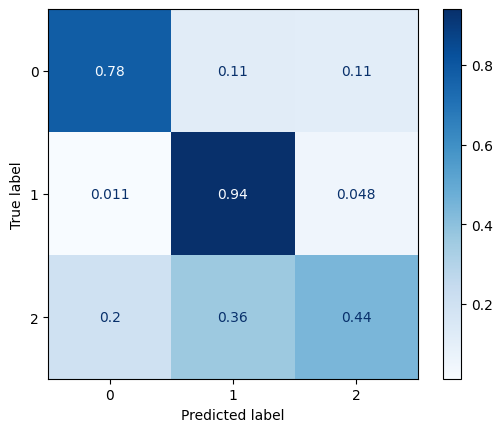

In [33]:
ConfusionMatrixDisplay.from_predictions(
    y_val,
    model.predict(x_val),
    normalize='true',
    cmap='Blues'
)

In [34]:
from sklearn.metrics import classification_report

In [35]:
report = classification_report(y_val, model.predict(x_val))
print(report)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       227
           1       0.82      0.94      0.88       354
           2       0.58      0.44      0.50       127

    accuracy                           0.80       708
   macro avg       0.75      0.72      0.73       708
weighted avg       0.79      0.80      0.79       708



BALANCEAMENTO DOS DADOS

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
y_train.value_counts()

Target
1    1413
0     910
2     508
Name: count, dtype: int64

In [38]:
oversample = SMOTE(
    random_state=81652,
)
x_balanceado, y_balanceado = oversample.fit_resample(
    x_train, y_train
)

In [39]:
y_balanceado.value_counts()

Target
1    1413
0    1413
2    1413
Name: count, dtype: int64

TREINAR MODELO BALANCEADO

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model_balanceado = RandomForestClassifier(
    random_state=23465,
    max_depth=100
)
model_balanceado.fit(x_balanceado, y_balanceado)

RandomForestClassifier(max_depth=100, random_state=23465)

In [42]:
model_balanceado.score(x_val, y_val)

0.78954802259887

MATRIZ CONFUSAO

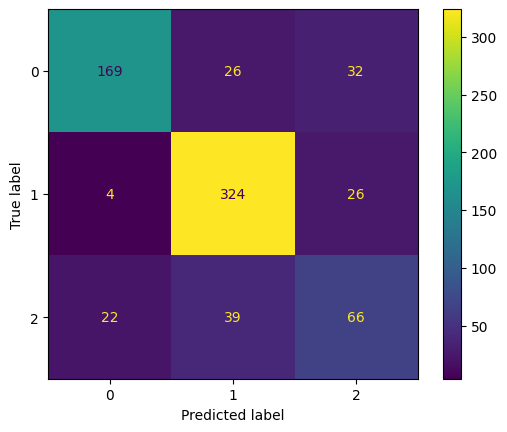

In [43]:
matriz = confusion_matrix(y_val, model_balanceado.predict(x_val))

disp = ConfusionMatrixDisplay(
    confusion_matrix=matriz, 
    display_labels=model_balanceado.classes_
    )

disp.plot()

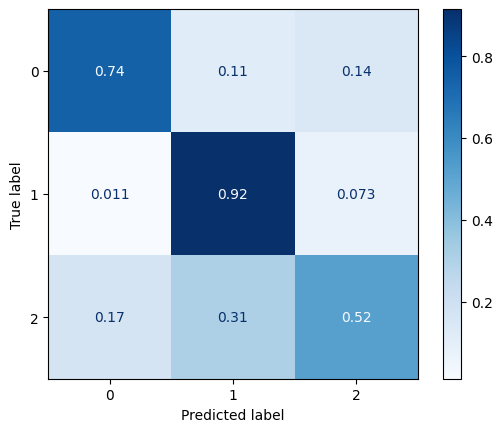

In [44]:
ConfusionMatrixDisplay.from_predictions(
    y_val,
    model_balanceado.predict(x_val),
    normalize='true',
    cmap='Blues'
)

In [45]:
report_balanceado = classification_report(y_val, model_balanceado.predict(x_val))
print(report_balanceado)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       227
           1       0.83      0.92      0.87       354
           2       0.53      0.52      0.53       127

    accuracy                           0.79       708
   macro avg       0.74      0.73      0.73       708
weighted avg       0.79      0.79      0.79       708



In [46]:
print(report)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       227
           1       0.82      0.94      0.88       354
           2       0.58      0.44      0.50       127

    accuracy                           0.80       708
   macro avg       0.75      0.72      0.73       708
weighted avg       0.79      0.80      0.79       708



VALIDAÇÃO CRUZADA

In [49]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

In [50]:
model = RandomForestClassifier(
    max_depth=10
)
pipeline = imbpipeline(
    [
        ('oversample', SMOTE()),
        ('floresta', model)
    ]
)

In [54]:
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=123,
)

x=df_final.drop(columns=['Target'])
y=df_final['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=23465)

cv_results = cross_validate(
    pipeline,
    x_train,y_train,
    cv=skf,
    scoring='recall_weighted'
)
cv_results['test_score']

array([0.75      , 0.76412429, 0.75706215, 0.78531073, 0.74257426])

In [55]:
media = cv_results['test_score'].mean()
desvio_padrao = cv_results['test_score'].std()
confianca = [media-2*desvio_padrao,media+2*desvio_padrao]
confianca 

[0.7305601159943459, 0.7890684570324483]

TESTAR MODELO

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       284
           1       0.81      0.86      0.83       442
           2       0.46      0.52      0.48       159

    accuracy                           0.75       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.77      0.75      0.76       885



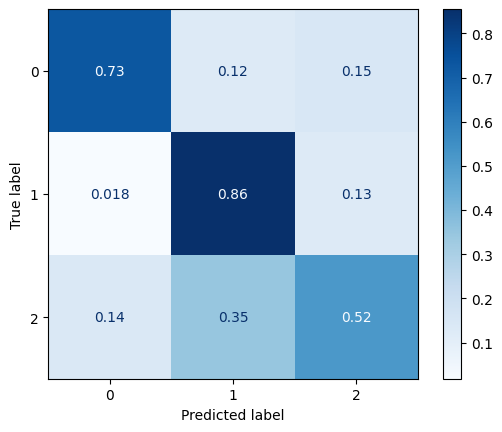

In [58]:
oversample = SMOTE(
    random_state=1234
)
x_balanceado,y_balanceado = oversample.fit_resample(x_train, y_train)
model = RandomForestClassifier(
    random_state=321,
    max_depth=10
)
model.fit(x_balanceado, y_balanceado)
predict = model.predict(x_test)

print(classification_report(y_test, predict))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    predict,
    normalize='true',
    cmap='Blues'
)